In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Read Data

In [12]:
data1 = pd.read_csv('./BankChurners.csv')
data1 = data1.drop(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'})
data1.shape

(10127, 21)

In [13]:
data1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Correlation Matrix

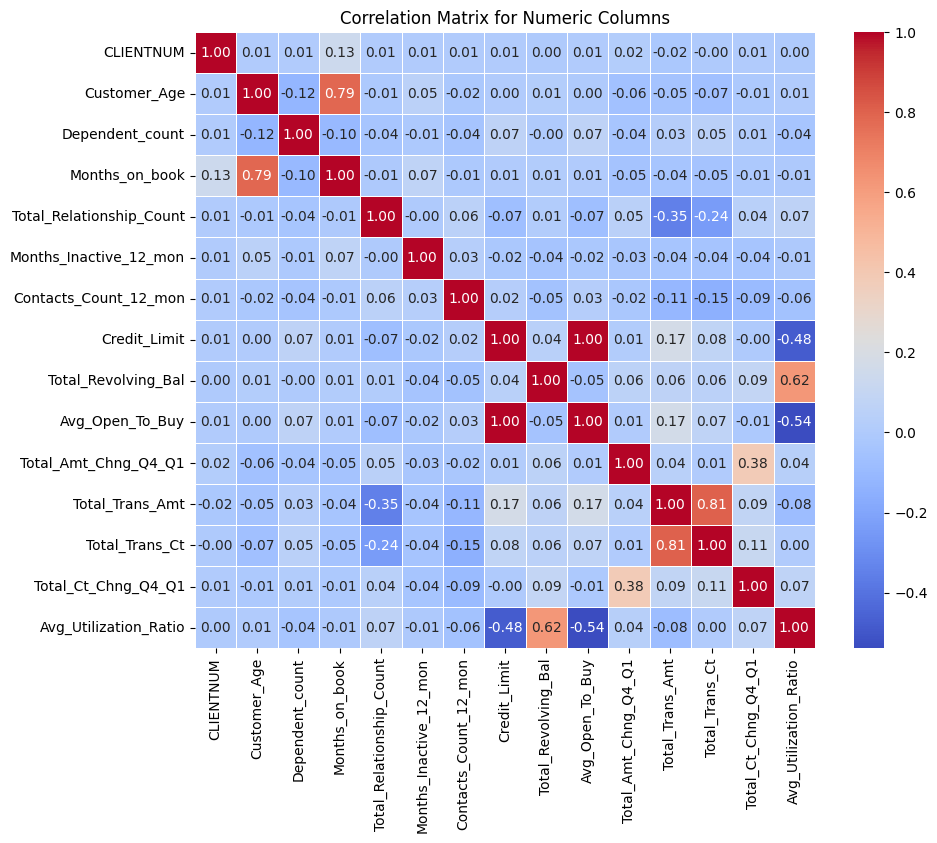

In [14]:
corr = data1[data1.select_dtypes(include=['int64', 'float64']).columns.tolist()].corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

#### Dividing Dataset into Target & Features

In [15]:
x = data1.drop(columns='Attrition_Flag')
y = data1.Attrition_Flag

# Descriptive Data Analysis

Below are some of the insights that can be obtained from the dataset before buliding the prediction model

#### Distribution of Total Transactions by Gender

In [16]:
x.Gender.value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

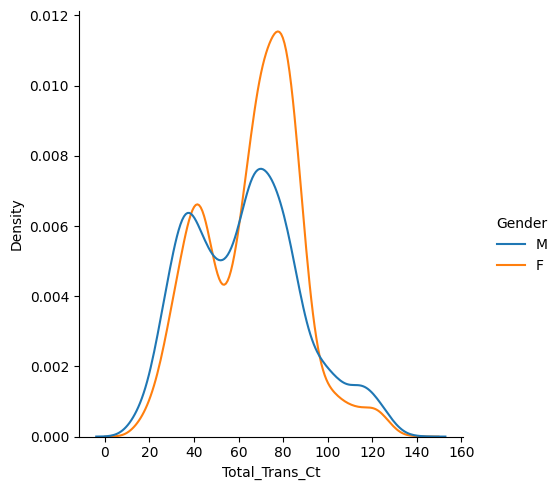

In [17]:
sb.displot(x, x='Total_Trans_Ct', hue='Gender', kind='kde')
plt.show()

The distributions of the total transactions are almost the same for Male and Female, except for the range (70,90) where we can see a significant spike in female customers in terms of number of transactions.

#### Total Transaction Amount VS Total Transactions by Target Variable

C:\Users\cadet\AppData\Local\Temp\ipykernel_20900\2987268770.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plt.scatter(x.Total_Trans_Amt, x.Total_Trans_Ct, c=y.replace({'Existing Customer':0, 'Attrited Customer':1}))


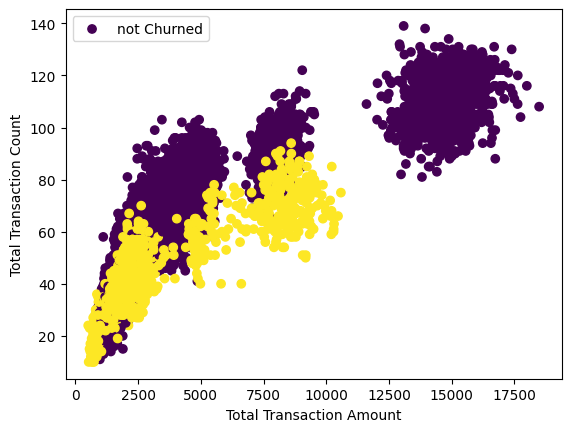

In [18]:
plt.scatter(x.Total_Trans_Amt, x.Total_Trans_Ct, c=y.replace({'Existing Customer':0, 'Attrited Customer':1}))
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')
plt.legend(['not Churned', 'Churned'])
plt.show()

We can clearly observe that customers with Total_Trans_Amt > 12,500 AND Total_Trans_Ct > 100 have not churned at all and even the rest of the data points we can see some clear differentiation between churned and not churned customers. So even before builiding the prediction model, we can get some understanding about how the classification might work and we can predict that total transaction amount and total transactions will be of high importance when it comes to feature importance.

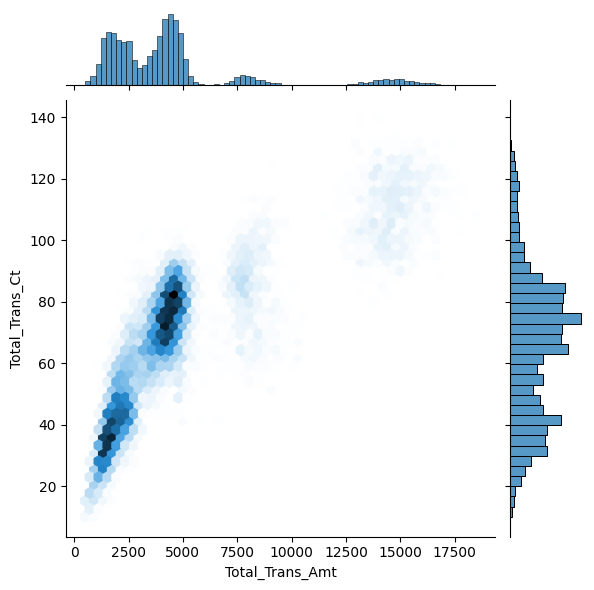

In [19]:
sb.jointplot(data=x, x='Total_Trans_Amt', y='Total_Trans_Ct', kind='hex')
plt.show()

The above joint plot with kind='hex' gives us some understanding about the density of data points which we cannot see in the scatter plot due to overlapping

#### Customer Age VS Months On Book

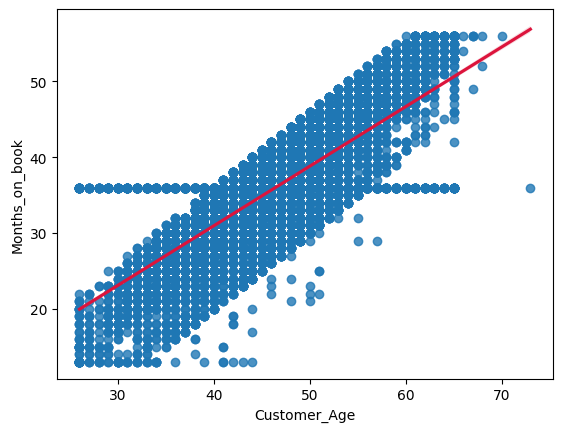

In [20]:
sb.regplot(x, x='Customer_Age', y='Months_on_book', line_kws={"color": "crimson"})
plt.show()

By looking at the regression plot, we can see a strong positive relationship between Customer_Age and Months_on_book. Later in this notebook, we can see the linear correlation coefficient between these 2 features is 0.79

#### Average Credit Limit by Gender and Age

C:\Users\cadet\AppData\Local\Temp\ipykernel_20900\2917846569.py:3: FutureWarning: The provided callable <function mean at 0x000001229D3862A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  corr_table1 = pd.pivot_table(data=x, index='Customer_Age', columns='Gender', values='Credit_Limit', aggfunc=np.mean)


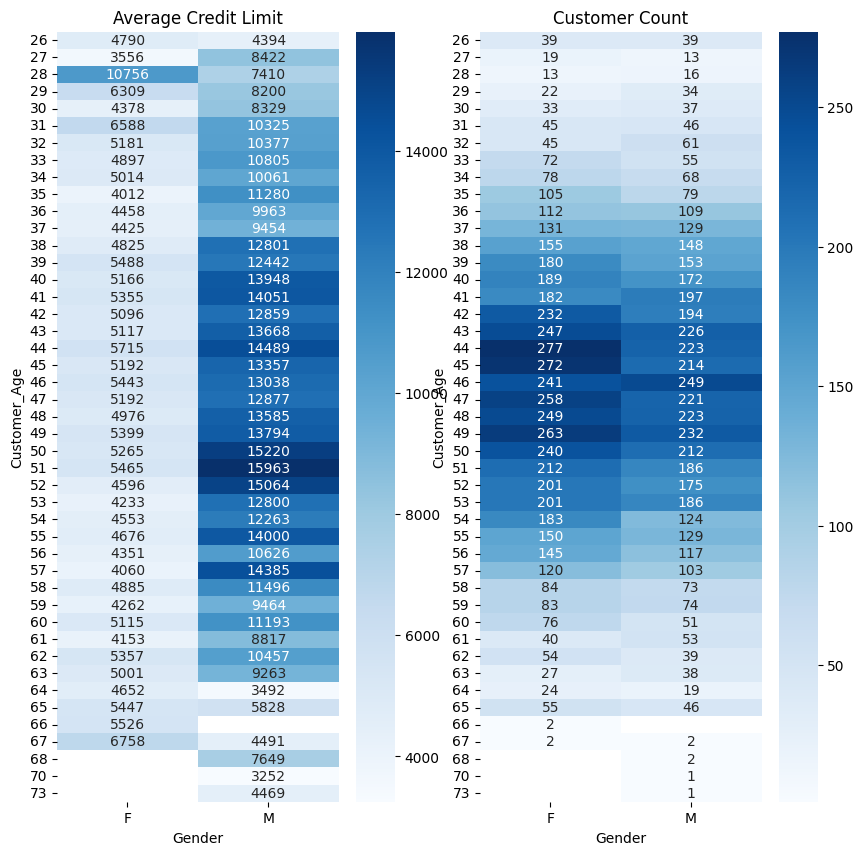

In [21]:
plt.figure(figsize=(10,10), dpi=100)
plt.subplot(1,2,1)
corr_table1 = pd.pivot_table(data=x, index='Customer_Age', columns='Gender', values='Credit_Limit', aggfunc=np.mean)
sb.heatmap(corr_table1, annot=True, fmt='.0f', cmap='Blues')
plt.title('Average Credit Limit')
plt.subplot(1,2,2)
corr_table2 = pd.pivot_table(data=x, index='Customer_Age', columns='Gender', values='Credit_Limit', aggfunc='count')
sb.heatmap(corr_table2, annot=True, fmt='.0f', cmap='Blues')
plt.title('Customer Count')
plt.show()

Average credit limit for male customers is significantly higher than that of female customers across all ages except for a few. When we consider male customers, the variance of average credit limit is greater than that of female customers. Male customers have highest average credit limits around the age of 50 and the highest for female customers is at the age of 28 which is quite suprising compared to the values of the neighboring ages.

#### Average Transactions by Marital Status and Dependent Count

C:\Users\cadet\AppData\Local\Temp\ipykernel_20900\767687464.py:3: FutureWarning: The provided callable <function mean at 0x000001229D3862A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  corr_table3 = pd.pivot_table(data=x, index='Dependent_count', columns='Marital_Status', values='Total_Trans_Ct', aggfunc=np.mean)


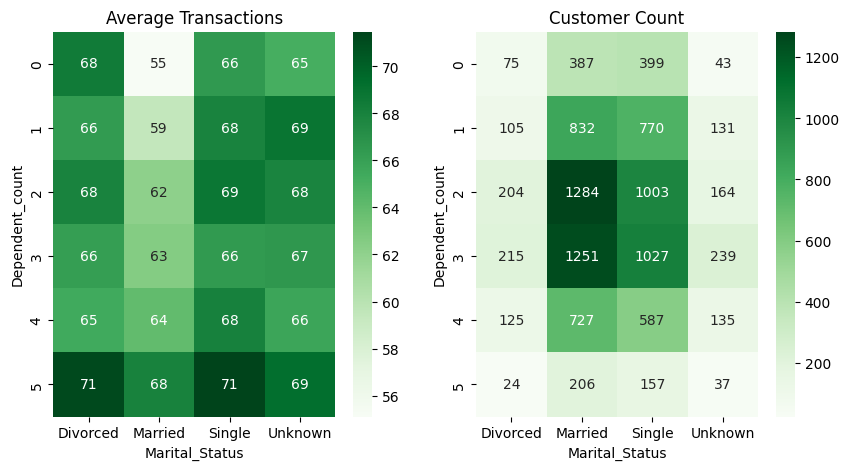

In [22]:
plt.figure(figsize=(10,5), dpi=100)
plt.subplot(1,2,1)
corr_table3 = pd.pivot_table(data=x, index='Dependent_count', columns='Marital_Status', values='Total_Trans_Ct', aggfunc=np.mean)
sb.heatmap(corr_table3, annot=True, fmt='.0f', cmap='Greens')
plt.title('Average Transactions')
plt.subplot(1,2,2)
corr_table4 = pd.pivot_table(data=x, index='Dependent_count', columns='Marital_Status', values='Total_Trans_Ct', aggfunc='count')
sb.heatmap(corr_table4, annot=True, fmt='.0f', cmap='Greens')
plt.title('Customer Count')
plt.show()

Regardless of the dependent count, married customers have the lowest average transactions. For all marital statuses, dependent count = 5 has the highest average transactions which is expected.

#### Total Transactions by Card Category 

In [23]:
x.Card_Category.value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

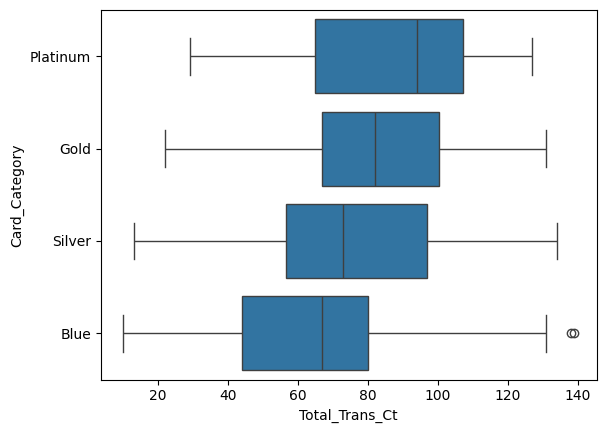

In [24]:
sb.boxplot(data=x, x='Total_Trans_Ct', y='Card_Category', orient='h', order=['Platinum','Gold','Silver','Blue'])
plt.show()

As we move up along the tier (from Blue to Platinum), the distribution of transactions moves to the right together with the median. Also, the range gets decreased as tier increases.

#### Credit Limit by Income Category

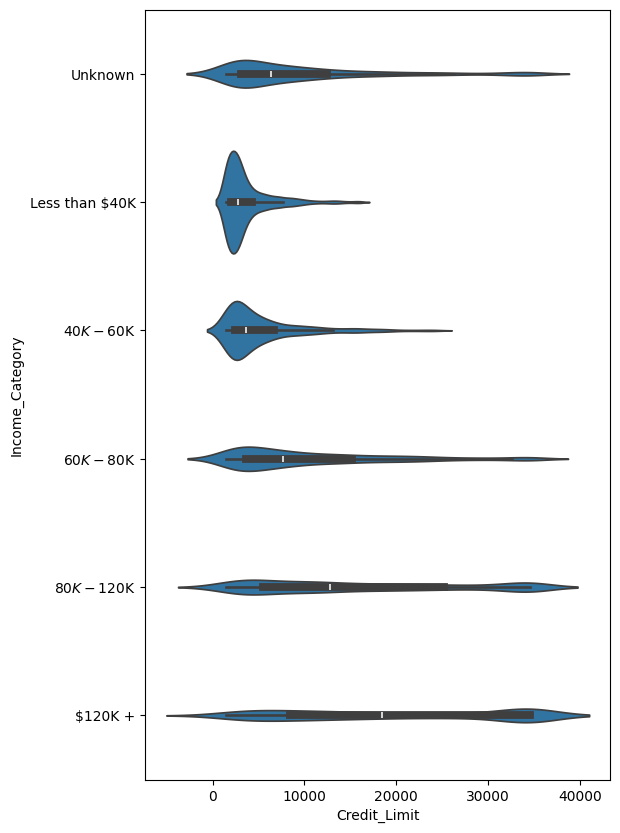

In [25]:
plt.figure(figsize = (6,10), dpi=100)
sb.violinplot(data=x, x='Credit_Limit', y='Income_Category', orient='h', order=['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'])
plt.show()

The distribution of the credit limit is left-skewed for the lower income categories and as the income increases, the curve gets flattened, median increases and the range and the inter-quartile range increase. This is expected since customers with lower income have restrictions in the credit limits whereas customers with higher income have a wider range to select. 

#### Distribution of Customer_Age

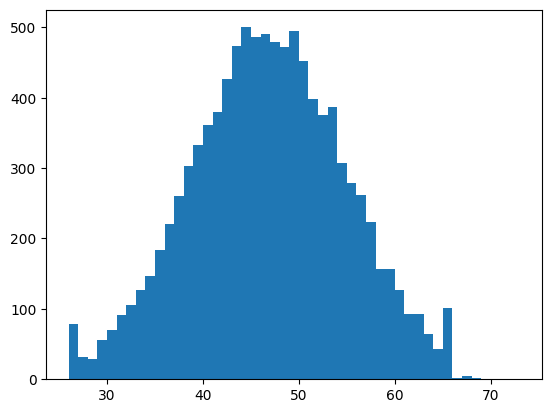

In [26]:
l1 = []
for i in np.arange(np.min(x.Customer_Age), np.max(x.Customer_Age) + 1, 1):
    l1.append(i)

plt.hist(x.Customer_Age, bins=l1)
plt.show()

The histogram of the age gives us a symmetric curve with mean and median approximately the same.

In [27]:
print(np.mean(x.Customer_Age))
print(np.median(x.Customer_Age))

46.32596030413745
46.0


# Data Preprocessing

### Splitting the dataset into Train and Test sets

To avoid any data leakage, splitting the dataset should be carried out before any data preprocessing

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69, stratify=y)

#### Removing the ID column of the dataset

In [29]:
x_train.CLIENTNUM.sort_values(ascending=True)

9821    708082083
1589    708083283
4417    708084558
6148    708085458
6784    708086958
          ...    
365     828281733
5837    828285858
2996    828291858
777     828298908
3943    828343083
Name: CLIENTNUM, Length: 8101, dtype: int64

CLIENTNUM = Client Number. Unique identifier for the customer holding the account.

Since there is no evidence that the records are sequential, we remove CLIENTNUM column

In [30]:
x_train = x_train.drop(columns='CLIENTNUM')
x_test = x_test.drop(columns='CLIENTNUM')

#### Checking for any Null values

In [31]:
x_train.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#### Checking for any Duplicates


In [32]:
x_train.duplicated().value_counts()

False    8101
Name: count, dtype: int64

In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 4022 to 2426
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   object 
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           8101 non-null   object 
 4   Marital_Status            8101 non-null   object 
 5   Income_Category           8101 non-null   object 
 6   Card_Category             8101 non-null   object 
 7   Months_on_book            8101 non-null   int64  
 8   Total_Relationship_Count  8101 non-null   int64  
 9   Months_Inactive_12_mon    8101 non-null   int64  
 10  Contacts_Count_12_mon     8101 non-null   int64  
 11  Credit_Limit              8101 non-null   float64
 12  Total_Revolving_Bal       8101 non-null   int64  
 13  Avg_Open_To_Buy           8101 non-null   float64
 14  Total_Amt_

After initial pre-processing steps, we now have a dataset with 19 features - 5 categorical variables and 14 numerical variables

### Feature-Encoding

Before categorical data can be utilized as input to a machine learning model, it must first be transformed into numerical data. There are multiple ways of handling Categorical variables. The two most widely used techniques:

    1. Label Encoding
    2. One-Hot Encoding

Label Encoding

A unique integer represents each value of the categorical variable. Issue with label encoding is that it can imply an unintended order to the variable. So, we use it only for ordinal variables of our dataset.

One-Hot Encoding

It simply creates additional features called dummy variables based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. Issue with one-hot encoding is the Dummy Variable Trap - a scenario in which variables are highly correlated to each other - multicollinearity. So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped. We use one-hot encoding for nominal variables of our dataset.

#### Encoding Target Variable - Attrition_Flag

When we check the sizes of the classes of the target variable, we can clearly see that the dataset is imbalanced. But in this exercise we do not focus on any over-sampling or under-sampling. We conduct our classification exercise to the actual dataset.

In [34]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

y_train.value_counts()

Attrition_Flag
Existing Customer    6799
Attrited Customer    1302
Name: count, dtype: int64

Attrition_Flag is the target varibale so we just use replacement when encoding

In [35]:
y_train = y_train.replace({'Existing Customer':0, 'Attrited Customer':1})
y_test = y_test.replace({'Existing Customer':0, 'Attrited Customer':1})

y_train.value_counts()

C:\Users\cadet\AppData\Local\Temp\ipykernel_20900\2866119147.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Existing Customer':0, 'Attrited Customer':1})
C:\Users\cadet\AppData\Local\Temp\ipykernel_20900\2866119147.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Existing Customer':0, 'Attrited Customer':1})


Attrition_Flag
0    6799
1    1302
Name: count, dtype: int64

#### One-Hot Encoding Categorical Nominal Variables - Gender, Marital_Status

In [36]:
x_train.Gender.value_counts()

Gender
F    4270
M    3831
Name: count, dtype: int64

In [37]:
x_train.Marital_Status.value_counts()

Marital_Status
Married     3736
Single      3165
Divorced     601
Unknown      599
Name: count, dtype: int64

In [38]:
df1 = pd.get_dummies(x_train.loc[:, ['Gender','Marital_Status']], prefix=['Gender','Marital_Status'], drop_first=True)
x_train = pd.concat([x_train, df1], axis=1)
x_train = x_train.drop(columns={'Gender','Marital_Status'})

In [39]:
df2 = pd.get_dummies(x_test.loc[:, ['Gender','Marital_Status']], prefix=['Gender','Marital_Status'], drop_first=True)
x_test = pd.concat([x_test, df2], axis=1)
x_test = x_test.drop(columns={'Gender','Marital_Status'})

Before one-hot encoding Gender and Marital_Status variables, we had 19 variables in our dataset. After creating dummy variables, we had 23 variables and we dropped one dummy variable from each to overcome the problem of multicollinearity. Finally, we have 21 variables in our dataset.

#### Label Encoding Categorical Ordinal Variables - Education_Level, Income_Category, Card_Category

In [40]:
x_train.Education_Level.value_counts()

Education_Level
Graduate         2491
High School      1620
Unknown          1207
Uneducated       1176
College           815
Post-Graduate     425
Doctorate         367
Name: count, dtype: int64

In [41]:
x_train.Income_Category.value_counts()

Income_Category
Less than $40K    2818
$40K - $60K       1446
$80K - $120K      1231
$60K - $80K       1132
Unknown            894
$120K +            580
Name: count, dtype: int64

In [42]:
x_train.Card_Category.value_counts()

Card_Category
Blue        7534
Silver       457
Gold          92
Platinum      18
Name: count, dtype: int64

In [43]:
x_train.Education_Level = x_train.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
x_train.Income_Category = x_train.Income_Category.replace({'Unknown':0, 'Less than $40K':20000, '$40K - $60K':50000, '$60K - $80K':70000, '$80K - $120K':100000, '$120K +':140000})
x_train.Card_Category = x_train.Card_Category.replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})
x_train = x_train.reset_index(drop=True)

C:\Users\cadet\AppData\Local\Temp\ipykernel_20900\48831308.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train.Education_Level = x_train.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
C:\Users\cadet\AppData\Local\Temp\ipykernel_20900\48831308.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train.Income_Category = x_train.Income_Category.replace({'Unknown':0, 'Less than $40K':20000, '$40K - $60K':50000, '$60K - $80K':70000, '$80K - $

In [44]:
x_test.Education_Level = x_test.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
x_test.Income_Category = x_test.Income_Category.replace({'Unknown':0, 'Less than $40K':20000, '$40K - $60K':50000, '$60K - $80K':70000, '$80K - $120K':100000, '$120K +':140000})
x_test.Card_Category = x_test.Card_Category.replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})
x_test = x_test.reset_index(drop=True)

C:\Users\cadet\AppData\Local\Temp\ipykernel_20900\3158282164.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test.Education_Level = x_test.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
C:\Users\cadet\AppData\Local\Temp\ipykernel_20900\3158282164.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test.Income_Category = x_test.Income_Category.replace({'Unknown':0, 'Less than $40K':20000, '$40K - $60K':50000, '$60K - $80K':70000, '$80K - $

In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Dependent_count           8101 non-null   int64  
 2   Education_Level           8101 non-null   int64  
 3   Income_Category           8101 non-null   int64  
 4   Card_Category             8101 non-null   int64  
 5   Months_on_book            8101 non-null   int64  
 6   Total_Relationship_Count  8101 non-null   int64  
 7   Months_Inactive_12_mon    8101 non-null   int64  
 8   Contacts_Count_12_mon     8101 non-null   int64  
 9   Credit_Limit              8101 non-null   float64
 10  Total_Revolving_Bal       8101 non-null   int64  
 11  Avg_Open_To_Buy           8101 non-null   float64
 12  Total_Amt_Chng_Q4_Q1      8101 non-null   float64
 13  Total_Trans_Amt           8101 non-null   int64  
 14  Total_Tr

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
pca.fit(x_train)

# Composantes principales
components = pca.components_
components

array([[ 6.13332653e-06,  2.17045834e-06, -4.57376084e-07,
         9.86461019e-01,  8.40775336e-07,  4.99621465e-06,
        -1.38938574e-07, -4.06175972e-07,  7.62190437e-07,
         1.16243601e-01,  5.78350493e-04,  1.15665250e-01,
         3.56224368e-08,  1.81610084e-03, -3.19356106e-05,
        -8.04718917e-08, -1.84161741e-06,  9.49837948e-06,
         2.33218674e-07, -2.25961641e-07,  5.80572990e-08],
       [-1.14595109e-05,  4.25706023e-06,  1.48711429e-06,
        -1.63802454e-01,  1.57143432e-05, -7.34028146e-06,
        -1.28923468e-05, -4.42828042e-07,  1.35357212e-06,
         6.95380702e-01, -1.84737436e-03,  6.97228076e-01,
         9.12378491e-08,  5.90251361e-02,  2.55807677e-04,
        -1.89193374e-08, -1.07396903e-05,  7.93195243e-07,
        -3.67037603e-06,  2.17325806e-06,  7.52244118e-07]])

In [47]:
# Scores des données sur les composantes principales
scores = pca.transform(X_train)
scores

NameError: name 'X_train' is not defined